## Visualizing the distribution of a dataset

通常，当我们在处理一堆数据时，我们首先想知道的就是数据中的变量的分布。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set(color_codes=True)

在seaborn中，distplot()是快速获得单变量分布的最快的方法

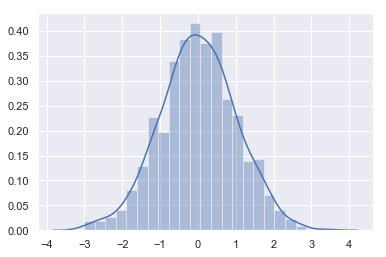

In [4]:
x = np.random.normal(size=800)
sns.distplot(x);

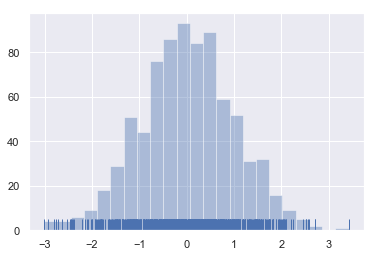

In [7]:
sns.distplot(x, kde=False, rug=True);

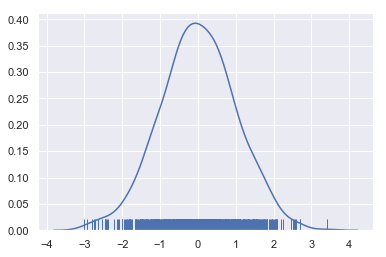

In [8]:
sns.distplot(x, hist=False, rug=True);

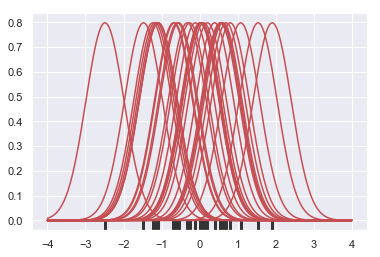

In [10]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(x, color=".2", linewidth=3);

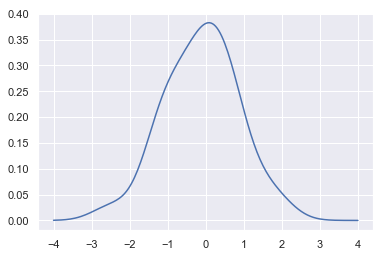

In [11]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

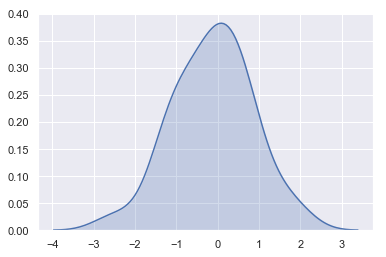

In [14]:
sns.kdeplot(x, shade=True);

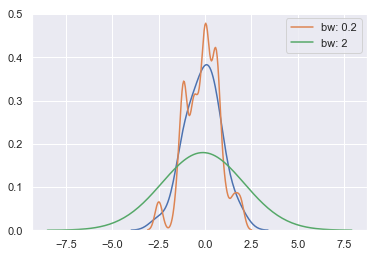

In [16]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

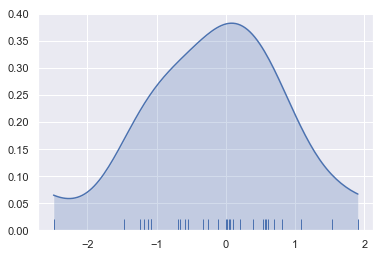

In [17]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

### Fitting parametric distributions

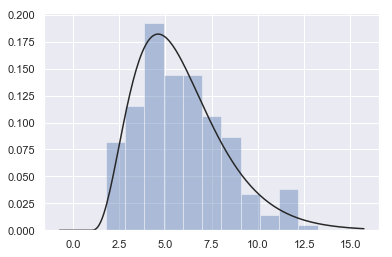

In [21]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

## Plotting bivariate distributions

In [23]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-1.501974,0.261350
1,0.752686,1.368143
2,0.886081,1.651474
3,0.697056,1.054911
4,-0.735980,0.295264


### Scatterplots

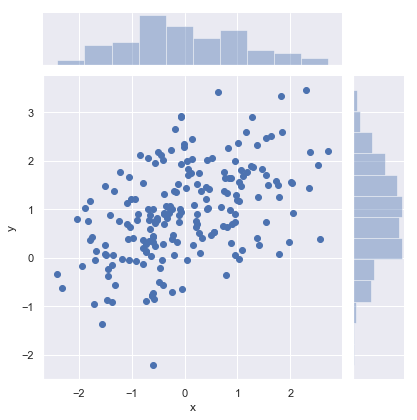

In [24]:
sns.jointplot(x="x", y="y", data=df);

### Hexbin plots

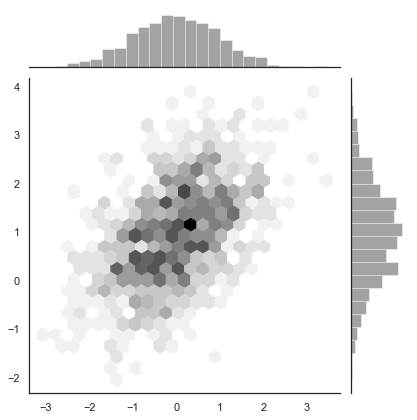

In [25]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### Kernel density estimation

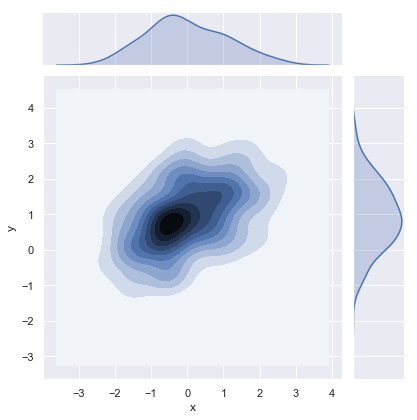

In [26]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

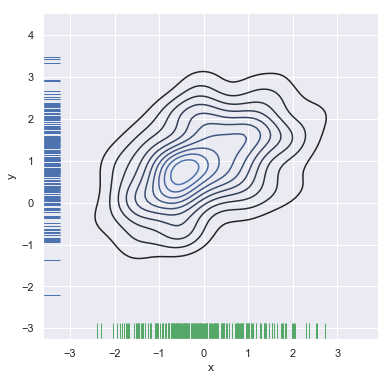

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax);
sns.rugplot(df.y, vertical=True, ax=ax);

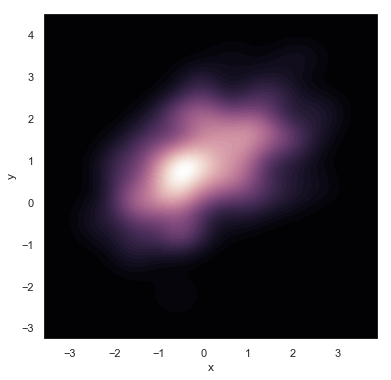

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

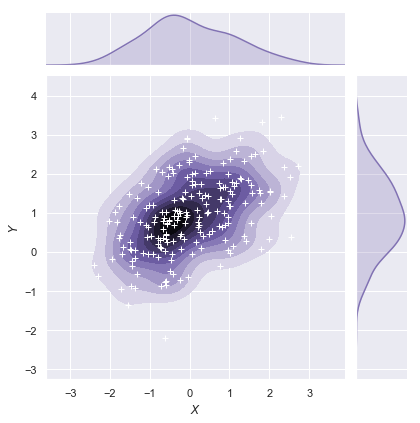

In [37]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing pairwise relationships in a dataset

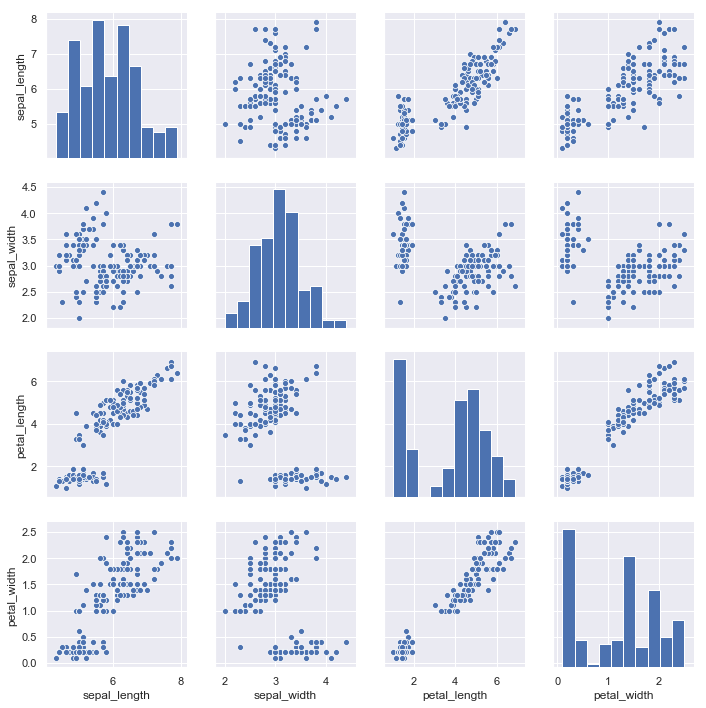

In [38]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

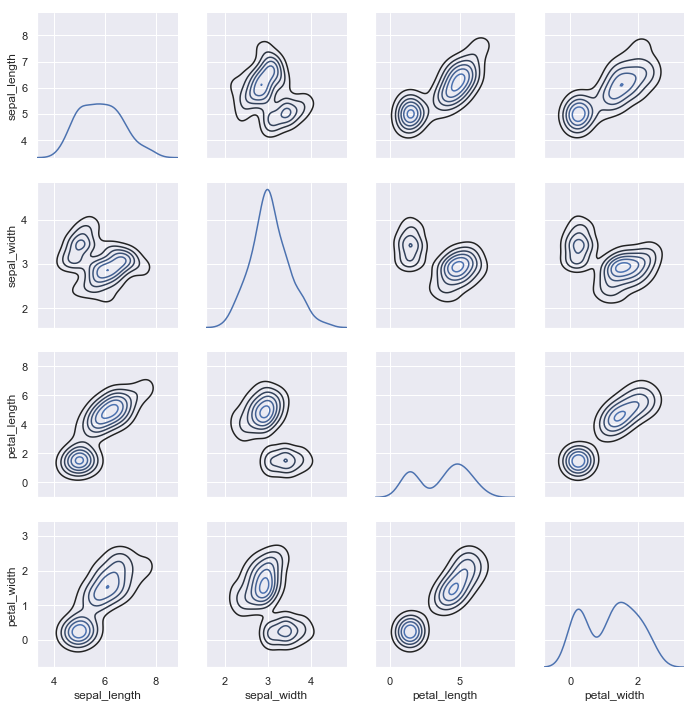

In [41]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);